# Метрики для оценки качества классификационной модели

<img src="images/100_accuracy.jpg">

**Источники:**

[Кластерный анализ](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)

[Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

[Performance Metrics in Machine Learning — Part 3: Clustering](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)

[Silhouette (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering))

[Rand index](https://en.wikipedia.org/wiki/Rand_index)

[Взаимная информация](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)

[Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

---

**Пакет Python: [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

In [2]:
X, y = datasets.load_iris(return_X_y=True)
model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = model.fit_predict(X)

Обучающие образцы не помечены (not labelled), что делает их относительно сложной задачей для выполнения и оценки.

Ключевым моментом является правильное измерение производительности алгоритмов кластеризации. Это особенно верно, поскольку **часто кластеры проверяются вручную**, чтобы определить, значимы ли результаты.

## Оценка силуэта (Silhouette Score)

Оценка силуэта (Silhouette Score) и график силуэта (Silhouette Plot) используются для измерения расстояния между кластерами.

**Silhouette Score отображает меру того, насколько близко каждая точка в кластере находится к точкам в соседних кластерах.**

Эта мера имеет диапазон $[-1, 1]$ и является отличным инструментом для визуальной проверки сходства внутри кластеров и различий между кластерами.

**Оценка силуэта рассчитывается с использованием среднего внутрикластерного расстояния (mean intra-cluster distance) ($i$) и среднего расстояния до ближайшего кластера (mean nearest-cluster distance) ($n$) для каждой выборки.**

Коэффициент силуэта для образца равен $\dfrac{(n - i)}{max(i, n)}$.

$n$ - это расстояние между каждым образцом и ближайшим кластером, частью которого образец не является, а $i$ - среднее расстояние внутри каждого кластера.

Типичные графики силуэта представляют метку кластера на оси `y`, а фактический показатель силуэта — на оси `x`.

Размер/толщина силуэтов также пропорциональны количеству образцов внутри этого кластера.

- **Чем выше коэффициенты силуэта (чем ближе к +1), тем дальше образцы кластера находятся от образцов соседних кластеров**.

- **Значение 0** указывает, что образец находится **на границе принятия решения между двумя соседними кластерами или очень близко к ней**. 

- **Отрицательные** значения, напротив, указывают на то, что эти образцы **могли быть отнесены к неправильному кластеру**. 

Усредняя коэффициенты силуэта, можно получить глобальный показатель силуэта, который можно использовать для описания показателей всей популяции с помощью одного значения.

**Преимущества:**

- Оценка ограничена от `-1` (за неправильную кластеризацию) до `+1` (за высокоплотную кластеризацию). Оценки около `0` указывают на перекрывающиеся кластеры.

- Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.

**Недостатки:**

- Коэффициент силуэта обычно выше для выпуклых кластеров, чем для других концепций кластеров, таких как кластеры на основе плотности, подобные тем, которые получены с помощью DBSCAN.

[sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [3]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

For n_clusters = 3 The average silhouette_score is : 0.5528190123564091


Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 3')

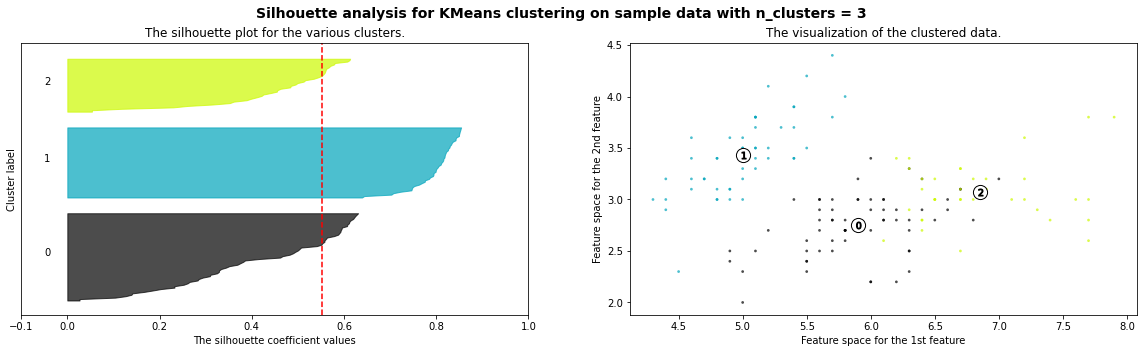

In [4]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
n_clusters = len(set(labels))
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')


## Индекс Калински-Харабаса (Calinski-Harabasz Index / Variance Ratio Criterion)

Оценка определяется как соотношение между дисперсией внутри кластера и дисперсией между кластерами.

Более высокий балл Калински-Харабаса относится к модели с лучше определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний).

**Преимущества:**

- Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.

- Оценка быстро вычисляется.

**Недостатки:**

- Индекс Калински-Харабаса обычно выше для выпуклых кластеров, чем для других концепций кластеров, таких как кластеры на основе плотности, подобные тем, которые получены с помощью DBSCAN.


[sklearn.metrics.calinski_harabasz_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)

In [5]:
from sklearn.metrics import calinski_harabasz_score

In [6]:
calinski_harabasz_score(X, labels)

561.62775662962

## *Индекс Рэнда (Rand Index)

(назван в честь Уильяма М. Рэнда)

Индекс Рэнда вычисляет меру сходства между двумя кластерами, рассматривая все пары выборок и подсчитывая пары, которые назначены в одном или разных кластерах в прогнозируемой и истинной кластеризации.

$RI$ может варьироваться от $0$ до $1$ (идеальное совпадение).

$\large RI=\cfrac{number\;of\;agreeing\;pairs}{number\;of\;pairs}$

Единственным недостатком Rand Index является то, что он предполагает возможность найти достоверные метки кластеров и использовать их для сравнения производительности модели, поэтому он гораздо менее полезен, чем Silhouette Score для задач чистого обучения без учителя.

[sklearn.metrics.rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html)

In [7]:
from sklearn.metrics.cluster import rand_score

rand_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [8]:
rand_score([0, 0, 1, 2], [0, 0, 1, 1])

0.8333333333333334

## *Индекс Рэнда с поправкой на случайность (Rand index adjusted for chance)

Rand Index вычисляет меру сходства между двумя кластерами, рассматривая все пары выборок и подсчитывая пары, которые назначены в одинаковых или разных кластерах в прогнозируемой и истинной кластеризации.

Затем исходный показатель $RI$ "корректируется на случайность" в показатель $ARI$ по следующей формуле:

$\large ARI = \cfrac{RI - ExpectedRI}{max(RI) - ExpectedRI}$

Таким образом **гарантируется, что скорректированный индекс Рэнда будет иметь значение, близкое к 0.0 для случайной разметки независимо от количества кластеров и выборок и точно 1.0, когда кластеризация идентична (с точностью до перестановки).**

ARI - симметричная мера: 
```
adjusted_rand_score(a, b) == adjusted_rand_score(b, a)
```

**Преимущества:**

- Интерпретируемость: нескорректированный индекс Рэнда пропорционален количеству пар выборок, чьи метки совпадают в обоих файлах `label_pred` и `labels_true` или различаются в обоих.

- Случайные (однородные) присвоения меток имеют скорректированную оценку индекса Rand, близкую к 0.0 для любого значения `n_clusters` и `n_samples` (что не относится, например, к нескорректированному индексу Rand или V-мере).

- Ограниченный диапазон: более низкие значения указывают на разные маркировки, аналогичные кластеры имеют высокий (скорректированный или нескорректированный) индекс Rand, `1.0` - это оценка идеального соответствия. Диапазон оценок составляет `[0, 1]` для нескорректированного индекса Rand и `[-1, 1]` для скорректированного индекса Rand.

- Не делается никаких предположений о структуре кластера: (скорректированный или нескорректированный) индекс Rand может использоваться для сравнения всех видов алгоритмов кластеризации и может использоваться для сравнения алгоритмов кластеризации, таких как k-среднее, которое предполагает изотропные формы капли с результатами спектрального анализа. алгоритмы кластеризации, которые могут найти кластер со "сложенными" формами.


**Недостатки:**

- Скорректированный или нескорректированный индекс Рэнда требует знания основных классов истинности, которые почти никогда не доступны на практике или требуют ручного назначения аннотаторами-людьми (как в условиях обучения с учителем).
    - Однако (скорректированный или нескорректированный) индекс Rand также может быть полезен в чисто неконтролируемой настройке в качестве строительного блока для консенсусного индекса (Consensus Index), который можно использовать для выбора модели кластеризации.

- Нескорректированный индекс Rand часто близок к 1.0, даже если сами кластеры значительно различаются. Это можно понять, интерпретируя индекс Рэнда как точность маркировки пар элементов, полученную в результате кластеризации: на практике часто существует большинство пар элементов, которым присваиваются разные метки пары как при прогнозируемой. Так и при базовой кластеризации истинности, что приводит к высокой доли парных меток, которые согласны, что впоследствии приводит к высокой оценке.

[sklearn.metrics.adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [10]:
adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [11]:
adjusted_rand_score([0, 0, 1, 2], [0, 0, 1, 1])

0.5714285714285714

In [12]:
adjusted_rand_score([0, 0, 0, 0], [0, 1, 2, 3])

0.0

## *Взаимная информация (Mutual Information)

Взаимная информация — статистическая функция двух случайных величин, описывающая количество информации, содержащееся в одной случайной величине относительно другой.

Взаимная информация определяется через энтропию и условную энтропию двух случайных величин.

Взаимная информация — это мера сходства между двумя метками одних и тех же данных. Где $|U_i|$ количество образцов в кластере $U_i$ и $|V_j|$ количество образцов в кластере $V_j$, взаимная информация между кластерами $U$ и $V$ задается как:

$$MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}$$

<img src="images/mutual-information.svg">

- Взаимная информация является симметричной функцией случайных величин.

- Взаимная информация неотрицательна и не превосходит информационную энтропию аргументов.

    - В частности, для независимых случайных величин взаимная информация равна нулю.
    
    - В случае, когда одна случайная величина является детерминированной функцией другой случайной величины, взаимная информация равна энтропии.
    
Как и в случае с Rand Index, одним из основных недостатков этой метрики является **необходимость априорного знания основных истинных меток для распределения**. То, чего почти никогда не бывает в реальных сценариях с Clustering.


**Преимущества:**

- Случайные (однородные) присвоения меток имеют оценку AMI, близкую к `0.0` для любого значения `n_clusters` и `n_samples` (что не относится, например, к необработанной взаимной информации или V-мере).

- Верхняя граница 1: значения, близкие к нулю, указывают на два назначения меток, которые в значительной степени независимы, тогда как значения, близкие к единице, указывают на значительное согласие. Кроме того, AMI, равный ровно 1, указывает, что два присвоения меток равны (с перестановкой или без нее).

**Недостатки:**

- Меры на основе MI требуют знания основных классов истинности, хотя практически никогда не доступны на практике или требуют ручного назначения аннотаторами-людьми (как в условиях обучения с учителем).
    - Однако показатели на основе MI также могут быть полезны в чисто неконтролируемой настройке в качестве строительного блока для согласованного индекса, который можно использовать для выбора модели кластеризации.

- NMI и MI не подвергаются случайной корректировке.

[sklearn.metrics.mutual_info_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html)

[sklearn.metrics.adjusted_mutual_info_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html)

[sklearn.metrics.normalized_mutual_info_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)

In [13]:
from sklearn.metrics import mutual_info_score

mutual_info_score([0, 0, 1, 1], [0, 0, 1, 1])

0.6931471805599453

In [14]:
mutual_info_score([0, 0, 1, 1], [1, 1, 0, 0])

0.6931471805599453

In [15]:
mutual_info_score([0, 0, 1, 2], [0, 0, 1, 1])

0.6931471805599452

In [16]:
mutual_info_score([0, 0, 0, 0], [0, 1, 2, 3])

0.0

## *Однородность, полнота и V-мера (Homogeneity, completeness and V-measure)

Зная присвоенные выборкам истинные базовые классы, можно определить некоторую интуитивно понятную метрику с помощью анализа условной энтропии. 

В частности, Розенберг и Хиршберг (2007) определяют следующие две желательные цели для любого кластерного разбиения:
- однородность (homogeneity): каждый кластер содержит только членов одного класса.
- полнота (completeness): все члены данного класса относятся к одному кластеру.

В `sklearn` имеются оценки `homogenity_score` и `completeteness_score`. Оба ограничены снизу `0.0` и сверху `1.0` (чем выше, тем лучше).

Их [гармоническое среднее](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B3%D0%B0%D1%80%D0%BC%D0%BE%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5) называется V-мерой (V-measure). 

*V-мера фактически эквивалентна взаимной информации (NMI) с функцией агрегирования, являющейся средним арифметическим.

**Преимущества:**

- Ограниченные оценки: $0.0$ - это настолько плохо, насколько это возможно, $1.0$ - идеально. 

- Интуитивная интерпретация: кластеризацию с плохой V-мерой можно качественно проанализировать с точки зрения однородности и полноты, чтобы лучше понять, какие "ошибки" допускаются при задании.

- Не делается никаких предположений о структуре кластера: может использоваться для сравнения алгоритмов кластеризации, таких как k-среднее предполагающее изотропные формы капли, с результатами алгоритмов спектральной кластеризации, которые могут находить кластер со "сложенными" формами.

**Недостатки:**

- Эти метрики требуют знания истинных классов, хотя почти никогда не доступны на практике или требуют ручного назначения людьми (как в условиях обучения с учителем).

- Метрики не нормализованы в отношении случайной маркировки (labeling): это означает, что в зависимости от количества выборок, кластеров и основных классов истинности полностью случайная маркировка не всегда будет давать одинаковые значения для однородности, полноты и, следовательно, v-меры. В частности, случайная маркировка не даст нулевых оценок, особенно при большом количестве кластеров.
    - Эту проблему можно спокойно игнорировать, если количество выборок больше тысячи, а количество кластеров меньше 10. Для меньших размеров выборки или большего количества кластеров безопаснее использовать скорректированный индекс, такой как Скорректированный индекс Рэнда (ARI).


[sklearn.metrics.homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)

[sklearn.metrics.completeness_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html)

[sklearn.metrics.v_measure_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html)

In [17]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import homogeneity_completeness_v_measure

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

In [18]:
homogeneity_score(labels_true, labels_pred)

0.6666666666666669

In [19]:
completeness_score(labels_true, labels_pred)

0.420619835714305

In [20]:
v_measure_score(labels_true, labels_pred)

0.5158037429793889

In [21]:
homogeneity_completeness_v_measure(labels_true, labels_pred)

(0.6666666666666669, 0.420619835714305, 0.5158037429793889)